<div align="center">
  <img src="img/viz.png"></img>
</div>
<table border="0">
  <tr>
    <td style="width:20%"><pre><b style="font-size:16px">a) 4D komplex függvény</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">b) Mandelbrot halmaz</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">c) N-test szimuláció részecsketrajektóriák</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">d) Prímszámok polársíkon</b></pre></td>
    <td style="width:20%"><pre><b style="font-size:16px">e) Clifford attraktor</b></pre></td>
  </tr>
</table>

# Adatvizualizáció

## Tartalom
1. [Bevezetés](#introduction)
2. [Motiváció](#motivation)
3. [ Hogyan tanuljunk vizualizálni? -- Egy érdekes példa](#nr)
    1. [Newton--Raphson-módszer valós zérushelyekre](#nr-real)
    2. [Newton--Raphson-módszer komplex zérushelyekre](#nr-complex)
    3. [Mi van, ha sok ponttal csináljuk ezt?](#nr-grid)
    4. [Színezzük ki a pontokat!](#nr-grid-colored-1)
    5. [Színezzük ki a kezdő rács pontjait egy N. lépés színei alapján!](#nr-grid-colored-2)
    6. [Növeljük a felbontást, hogy meglássuk a... ezt az izét?](#nr-fractal)
4. [Tippek/trükkök, amiket (talán?) nem ismetek](#tips-and-trick)
    1. [Colormap-ek](#colormaps)
    2. [Subplotok használata](#built-in)
    3. [A Google és a dokumentációk használata](#google-and-docs)
5. [Kitekintés](#other)
    1. [Python -- Manim és egyebek](#manim)
    2. [Processing](#processing)

## I. Bevezetés <a name="introduction"></a>

<p style="font-size:16px">
Az adatvizualizáció egy terjedelmes témakör. Habár pl. a természettudományos területeken tanulóknak/dolgozóknak elsőre a saját szakterületük juthat eszébe róla, ez valójában nem tartozik specifikusan egyetlen tudományterülethez sem. Adatvizualizációra bármilyen téren és így bármilyen formában szükség lehet, legyen az egy szakcikk, vagy egy céges kimutatás, esetleg egy szoftver forráskódjait alkotó fájlok hierarchiájának vizualzációja. A sor pedig végtelen. Felhasználási területtől és céltól függően megszámlálhatatlanul sok szoftver és eszköz áll az ember rendelkezésére. Annyira sok, ezeknek már csak egy apró részét is hosszadalmas folyamat lenne elsajátítatni. Ahogy ez minden mással is így van, minden nem lehet megtanulni, így érdemes ezek között körbenézni és a választékból csipegetni. Azonban "ráérezni" és "érteni", hogy mitől lesz jó egy vizualizáció - függetlenül a felhasznált szoftvertől -, már egy sokkal általánosabb tudás, amit folyamatosan bővítve, bármilyen bizualizációs területen, vagy szoftver használata során felhasználhatunk.
<br><br>
Ennek az egész előadásnak/Notebooknak a célja az lenne, hogy legalább egy pici extra betekintést nyújtson a vizualizáció eléggé tág világába, aminek legtöbb esetben az ember csak egy kis szegletét ismeri, ezzel is tágítva a világnézetét ilyen téren. Emellett a is cél, hogy adjon valamennyi plusz motivációt ahhoz, hogy az ember rávegye magát, hogy megtanuljon szép ábrákat és vizualizációkat készíteni.
</p>

In [1]:
from intro import *

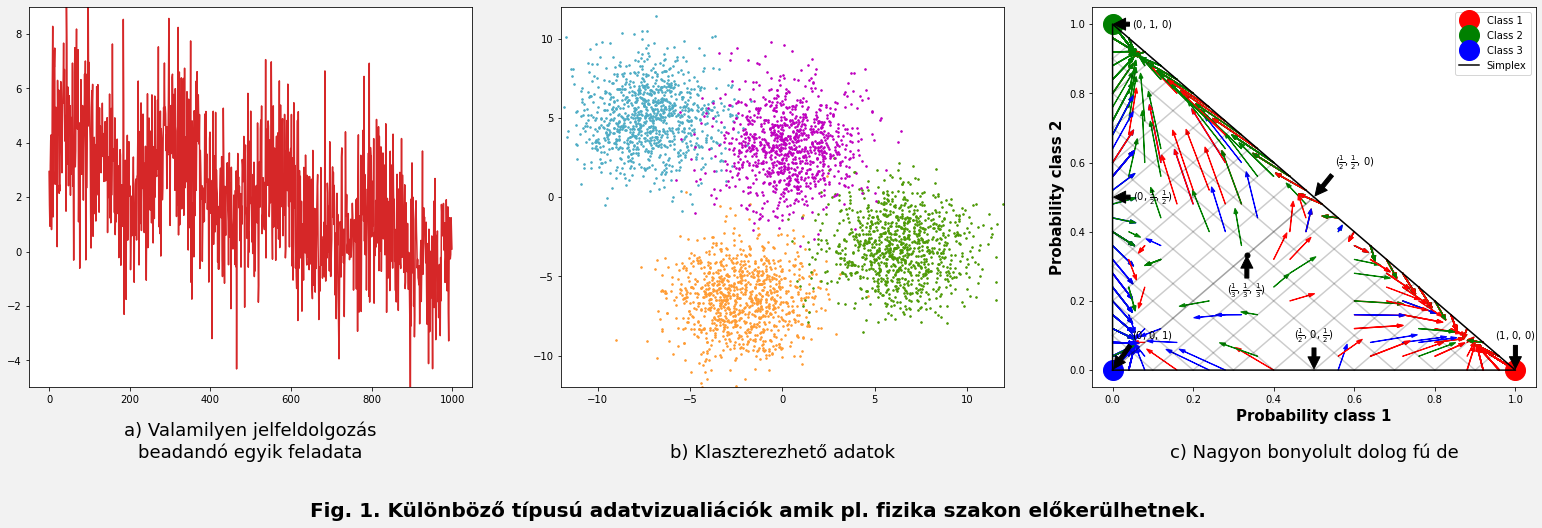

In [2]:
intro_figures()

<p style="font-size:16px">
De persze egészen más típusú dolgok esetében is előjöhet a vizualizációs technikák használata.
</p>

## II. Motiváció <a name="motivation"></a>

<p style="font-size:16px">
Miért érdemes megtanulni új módszereket és technikákat, amikkel az ábráinkat fejleszthetjük? Példaként itt egy összehasonlítás a Betelgeuse fénygörbéjéről. Mindkét lenti képen ugyanaz az adatsor van ábbrázolva, csak épp a második kép elkészítésébe több energiát fektettem...
</p>

In [3]:
star_data = open_betelgeuse_data(data_file='./data/betelgeuse.csv')

In [4]:
greg_dates = format_dates(star_data)

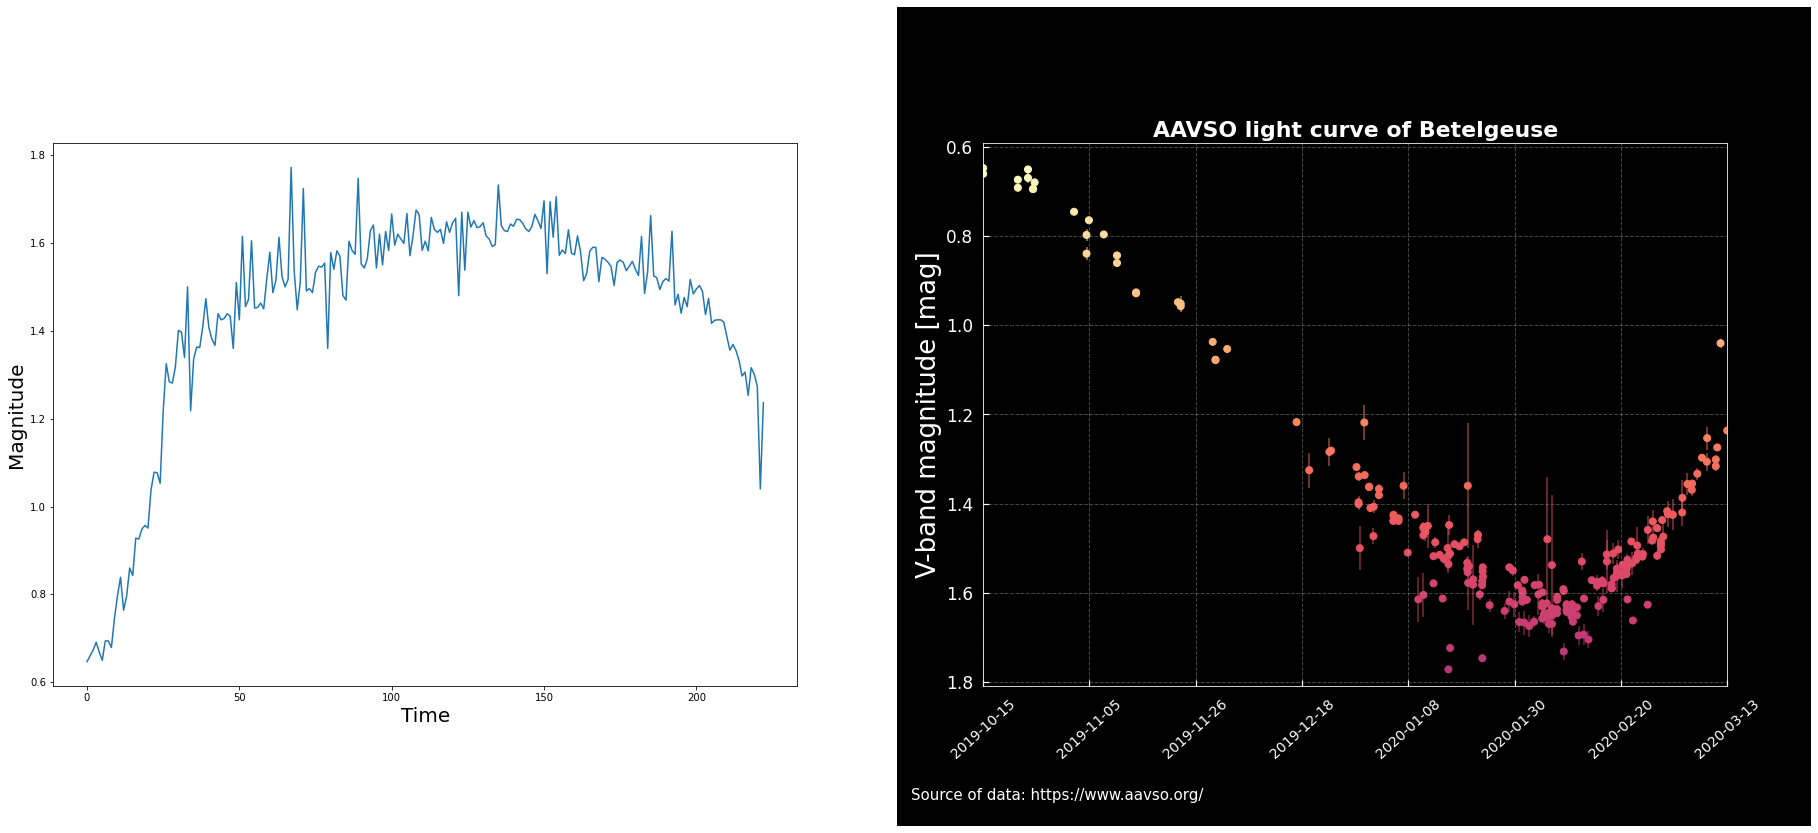

In [5]:
compare_plots(star_data, greg_dates)

<p style="font-size:16px">
Mi a nagy probléma ezzel az egész helyzettel? A legtöbb olyan esetben, amikor az egyetemi tanulmányai során az embernek valamilyen ábrát kell készítenie (pl. beadandókhoz, jegyzőkönyvekbe, stb.), akkor nincs igazán motiválva arra, hogy valami szépet is alkosson. (Ezt mind saját tapasztalat, mind pedig az elmúlt években a sokan másoktól hallottak alapján írom.) Ha az ember magától nem kezd el aktívan figyelni arra, hogy szép ábrákat készítsen a kötelező beadandókba, vagy nem kezdi el megtanulni azt a saját maga számára kitalált projekteken keresztül, akkor mire eljut a munkáig, vagy a cikkírásig, már elég késő lesz. Szenvedni fog azzal, hogy a maximális teljesítésen felül, minél rövidebb idő alatt behozza a lemaradását.
<br><br>  
Ez nem mindenkinek megy természetesen és egyre több friss cikket látok, amiben elég csúnyácska 1-2 ábra és egyértelműen látszik, hogy nem fektettek bele túl sok időt és szaktudást. (Ide akartam tenni egy-két példát, de ez máskorra marad. Addig is megfogadom, hogy majd lementem a csúnya ábrás cikkeket, amikbe belefutok a jövőben...)
</p>

## III. Hogyan tanuljunk vizualizálni? -- Egy érdekes példa <a name="nr"></a>

<p style="font-size:16px">
Míg mindenki számára más és más módszerek válnak be a legkülönfélébb dolgok tanulásához, addig a vizualizáció esetében érdemes észben tartani, hogy ez az egész tulajdonképpen programozás. Ahogy bármilyen programkód megírásakor is az a lényeg, hogy az ember tisztában legyen a rendelkezésére álló eszközökkel, azok használatával és a felmerülő problémák kezelésével és az azokhoz való hozzáállással, úgy a vizualizáció esetében is pontosan ezeket kell szem előtt tartani mind a tanulás, mind a munka során.
<br><br>
A fentieket figyelembe véve, a szép ábrák készítéséhez két általános módszert vethetünk be. Az első, hogy az ember folyamatosan nyitott szemmel jár, ha lát egy cikkben, vagy bárhol az interneten egy tetszetős vizualizációt, akkor megnézi alaposan és megpróbál tanulni belőle. A természettudománynál maradva -- ha már fizikásoknak készül ez az egész -- a cikkekben levő ábrákon megnézhetjük pl, hogy milyen színeket, vagy milyen színgradienst használtak az ábrához (ez talán, ami először feltűnik bárkinek). Utána: milyenek a tengelyfeliratok? Mekkorák a betűk az ábrához képest? Milyen formátumúak a tengelyek mentén található számok? Ha pl. ezek nagyon nagy, vagy nagyon kicsi számok, azok hogyan vannak jelölve? Vannak-e rácsvonalak? Ha igen, milyen színűek, mennyire áttetszőek, milyen vastagok? Szaggatott vonalak-e, vagy simák? És lehetne még tovább sorolni mennyi mindent meg lehet alaposan figyelni bármilyen grafikonon. Minél több ilyet lát az ember, annál jobban fogja tudni ezeket az információkat a saját ábráira is extrapolálni és a megfigyelteket így magától is alkalmazni.
</p>

In [6]:
from what_figs import *

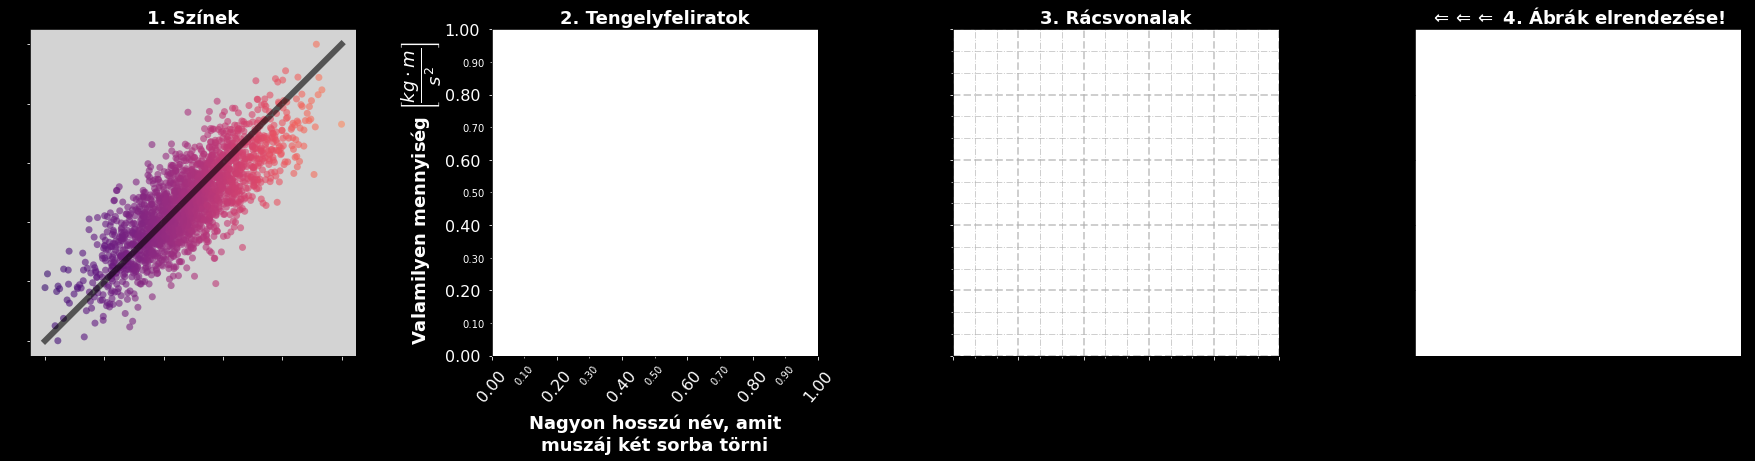

In [7]:
fig_parts(n_samples=2000, noise=30)

<p style="font-size:16px">
A második módszer az előző mondat gyakorlatba ültetése: saját ábrák készítése. Mind a vizualizációk készítésében, mind pedig más programozási feladatokban a legtöbbet az segít, 
</p>

In [8]:
from polynomial import Polynomial

In [9]:
P = Polynomial(c=[2,5,-14,-2])

### Newton--Raphson-módszer valós zérushelyekre <a name="nr-real"></a>

In [10]:
from newton_plots import *

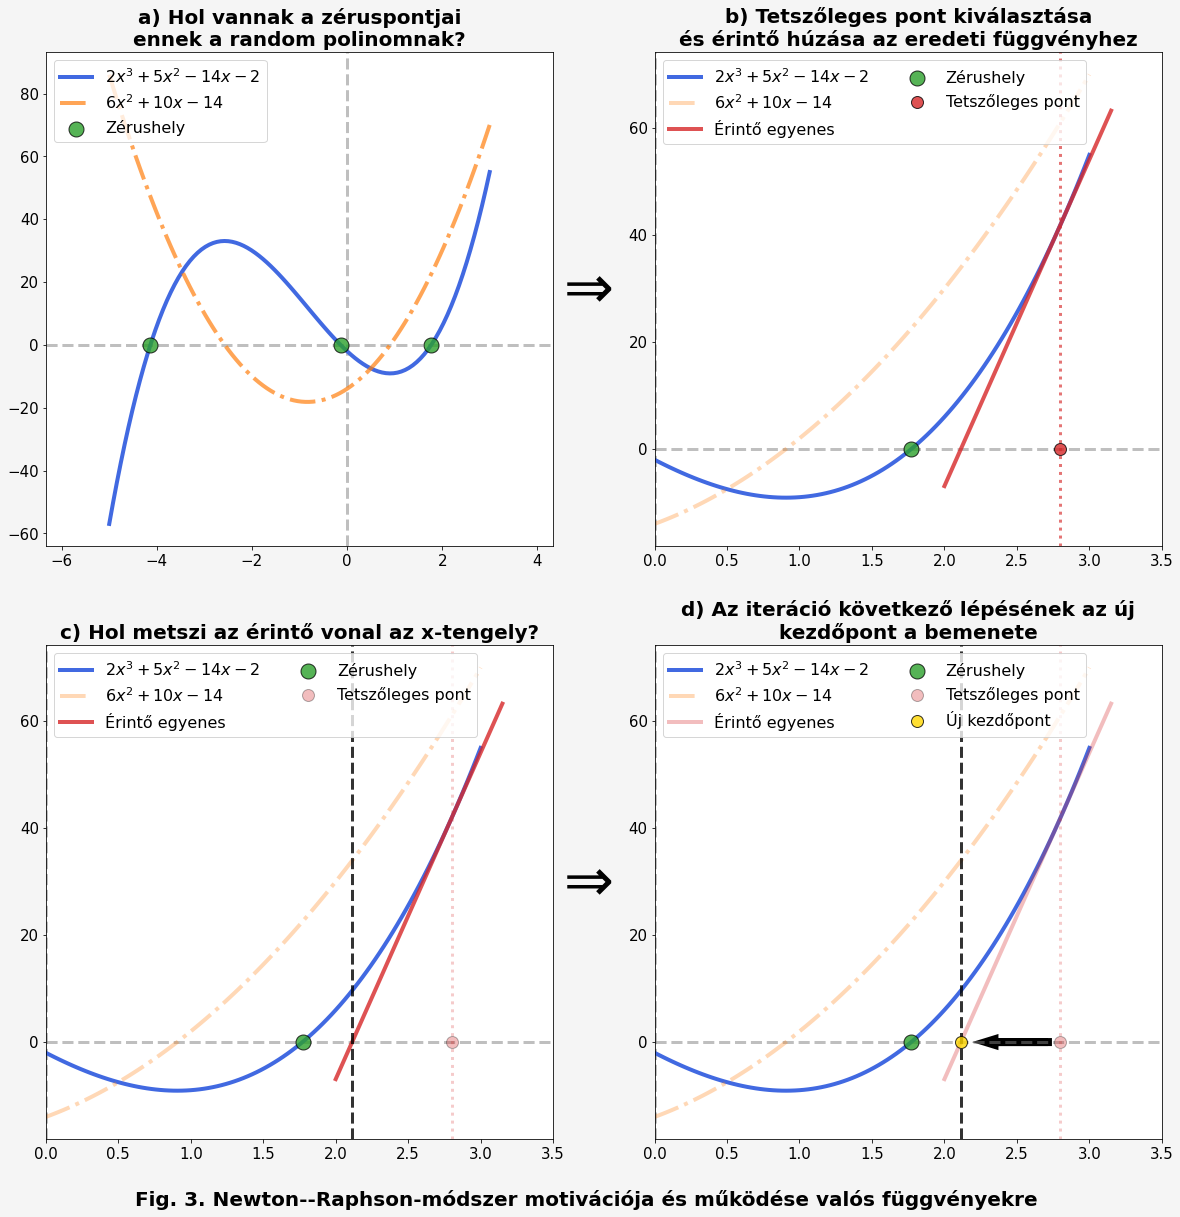

In [11]:
NR_intro(P)

<p style="font-size:16px">
A fenti lépéseket addig ismételjük, míg az érintő és az X-tengely metszete egybe nem esik az egyik zérushellyel. Ez egy iterációs eljárás, ahol minden következő lépést az előző eredménye határoz meg. Az egyes lépésekben kapott új $x_{n+1}$ pont helyét kifejezhetjük az alábbi módon:
<br>
$$
x_{n+1}
=
x_{n} - \frac{\mathcal{P} \left( x_{n} \right)}{\mathcal{P}\,' \left( x_{n} \right)}
$$
<br>
Megeshet olyan helyzet, amikor az iteráció egy lokális minimumnál beragad és egészen addig ugrál akörül, míg valami véletlen folytán egy zérushely közelébe nem kerül. Erről az helyzetről a továbbiakban tárgyalok. (Ez az egész lényege ennek a résznek.)
</p>

### Newton--Raphson-módszer komplex zérushelyekre <a name="nr-complex"></a>

In [12]:
P = Polynomial(c=[1,0,0,1,-1,1])
#grid_lim = (-1.75, 1.75)
grid_lim = None

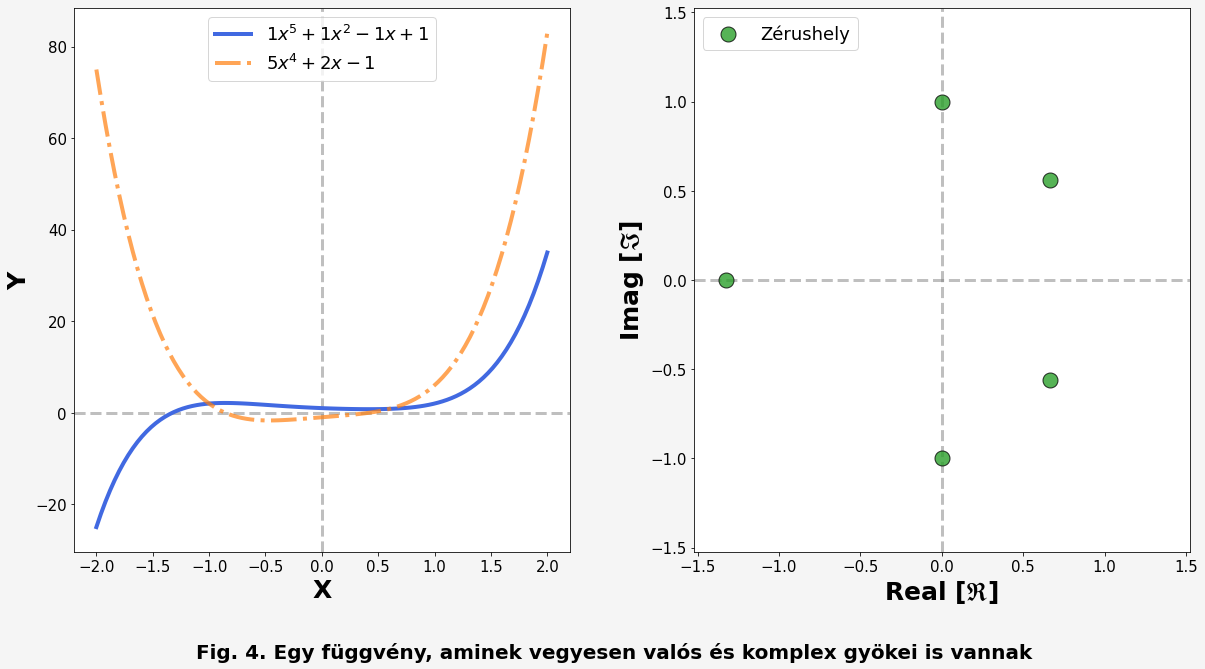

In [13]:
NR_complex_intro(P,
                 grid_lim=grid_lim)

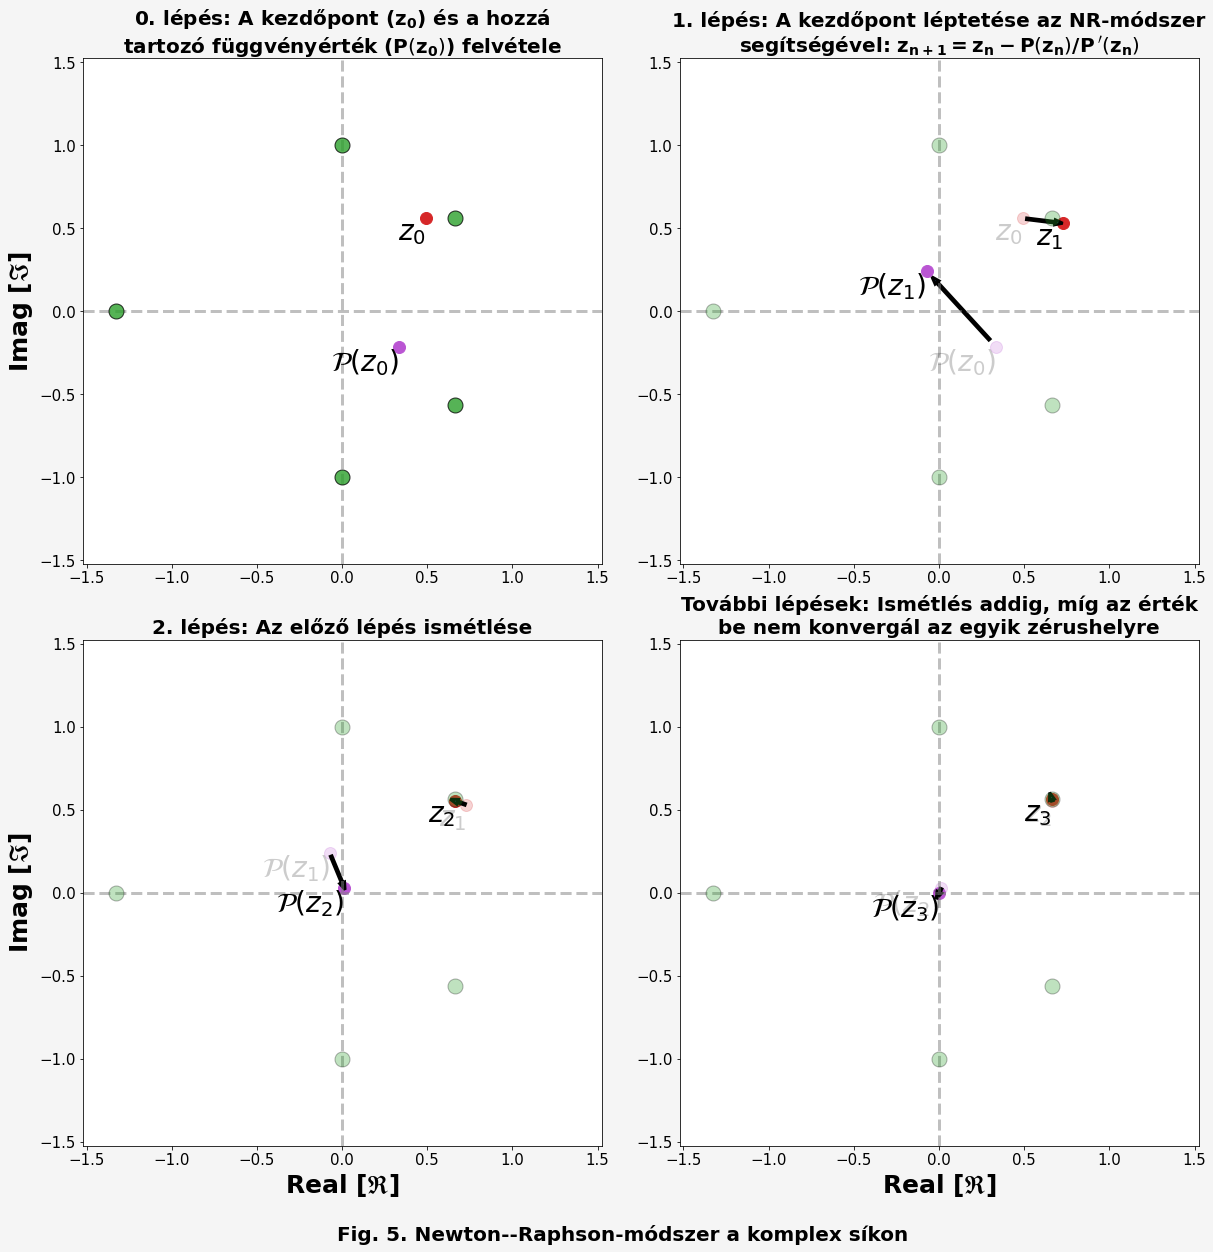

In [14]:
NR_complex_method(P, x_0=(0.49+0.56j),
                  grid_lim=grid_lim)

### Mi van, ha sok ponttal csináljuk ezt? <a name="nr-grid"></a>

In [15]:
# Pontok száma
N = 64

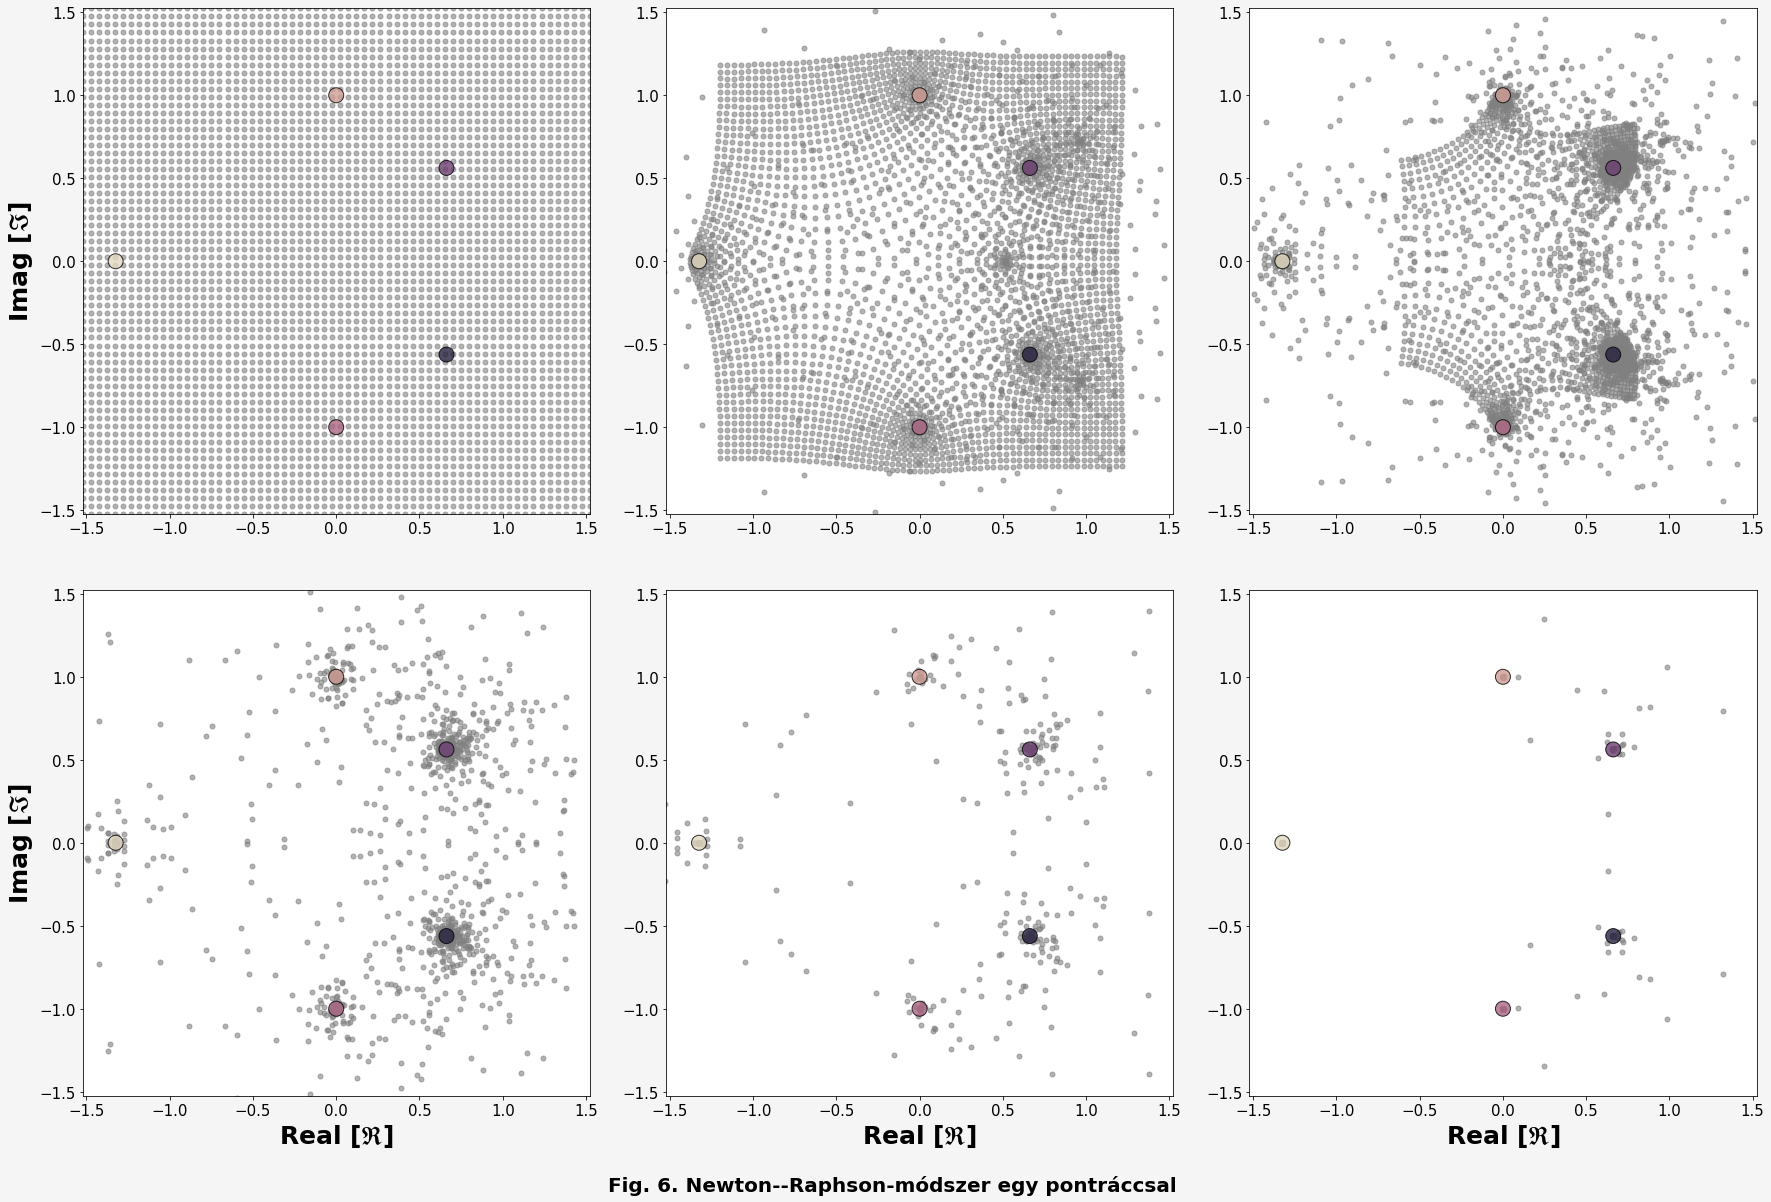

In [16]:
NR_fractal_steps_gray(P, N=N,
                      steps=[1,2,3,4,5],
                      grid_lim=grid_lim)

### Színezzük ki a pontokat! <a name="nr-grid-colored-1"></a>
<p style="font-size:16px">
A rácspontokat minden egyes vizualizált iteráció után (amiket az egyes alábrák jelölnek), újraszínezzük. Az egyes zérushelyekhez eltérő színeket rendelünk, majd megnézzük, hogy melyik pont melyik zérushelyhez van térben (vagy hát itt síkban na) a legközelebb. Minden egyes pontot ezután kiszínezünk a hozzá legközelebb levő zárushely színével. Különböző számú iterációt elvégezve mindegyikről készíthető egy színezett ábra, amin mind az eredeti rácspontok aktuális pozíciója látszik, mind pedig az, hogy az adott iterációban melyik zérushelyhez esnek a legközelebb. Minden ábra fölött jelezve van, hogy az hanyadik Newton--Raphson lépést ábrázolja.
<br><br>
A színezéshez egyébként itt a <code>seaborn</code> csomagban található colormap-ek egyikét használtam, melyet az alábbi függvénnyel definiáltam:
</p>

```python
def get_cmap():  
  return sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
```
<p style="font-size:16px">
A <code>seaborn</code>ban elérhető -- és paraméterekkel könnyedén változtatható -- colormap-ek az alábbi linken találhatóak: <a href="https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-palettes">Seaborn colormap-ek</a>.
</p>

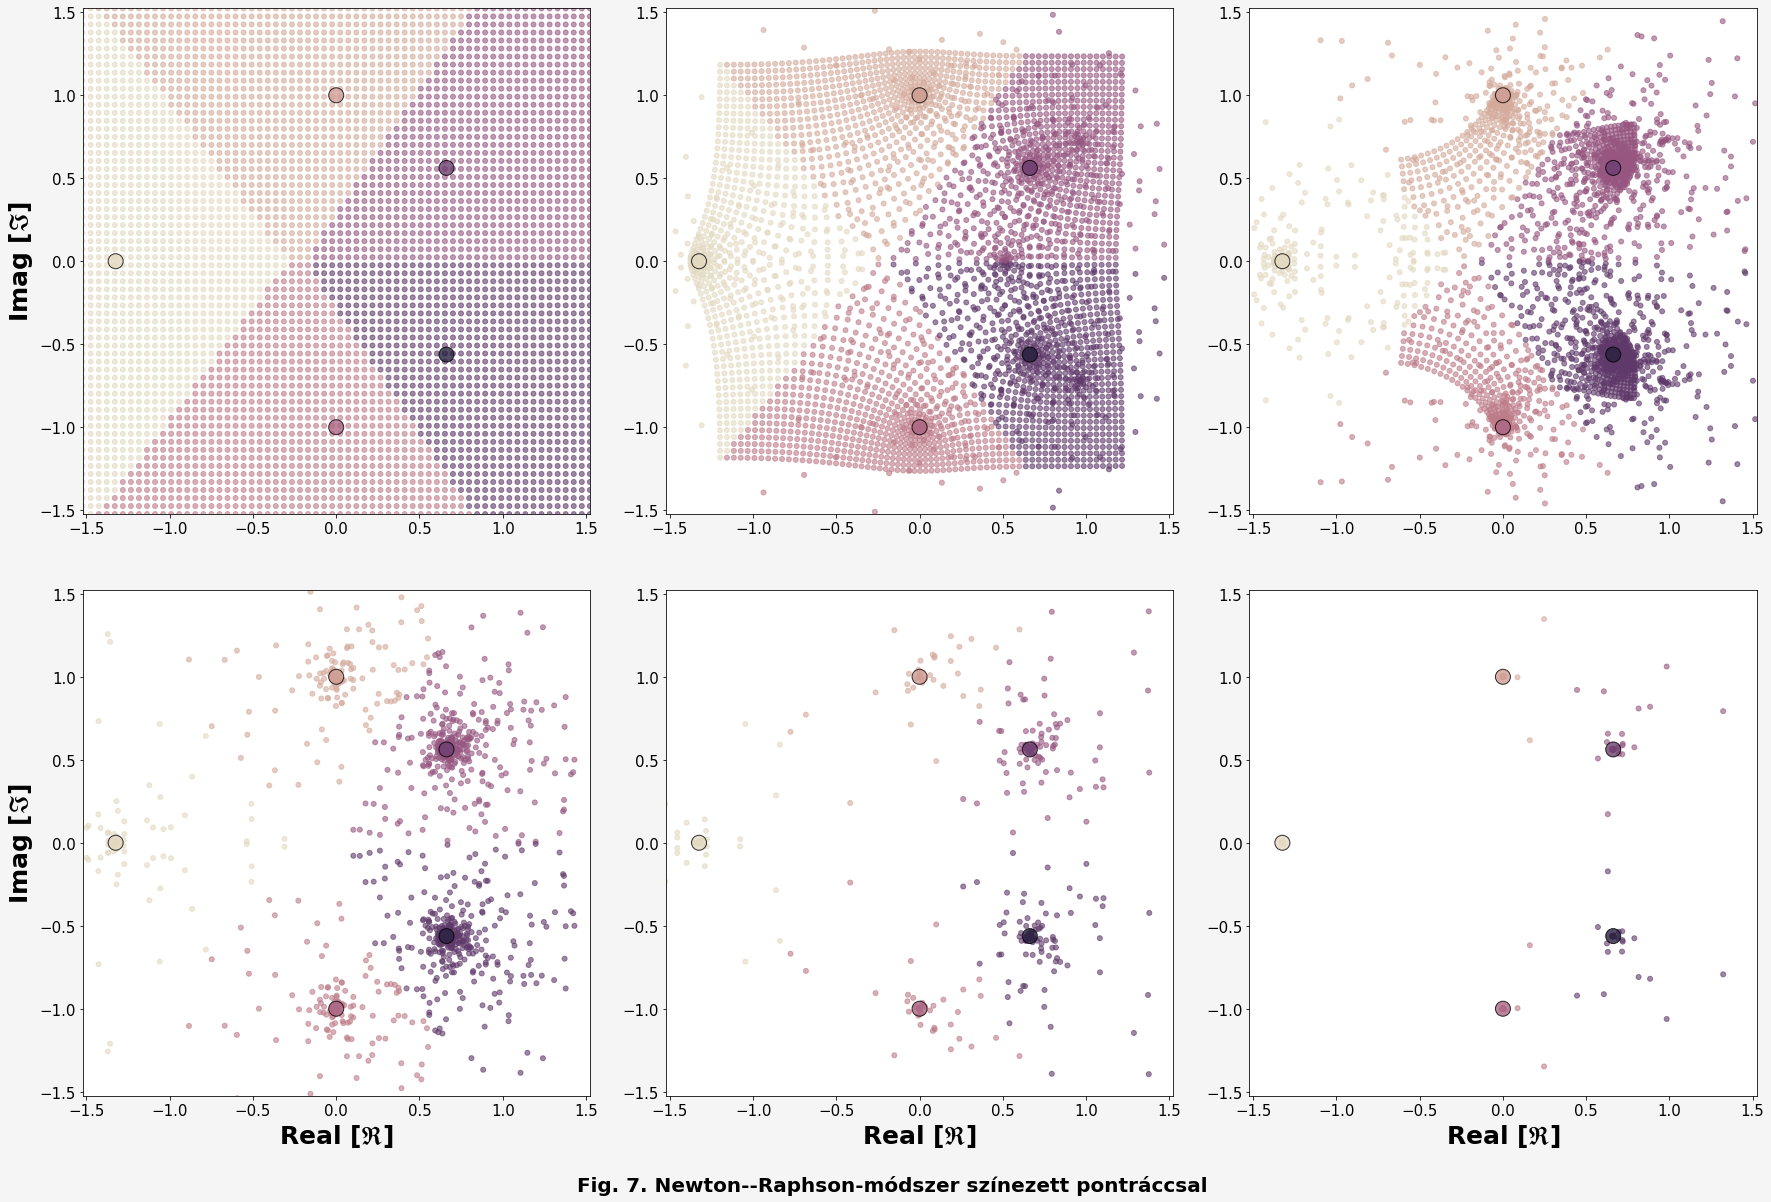

In [17]:
NR_fractal_steps_colored(P, N=N,
                         steps=[1,2,3,4,5],
                         grid_lim=grid_lim)

### Színezzük ki a kezdő rács pontjait egy N. lépés színei alapján! <a name="nr-grid-colored-2"></a>

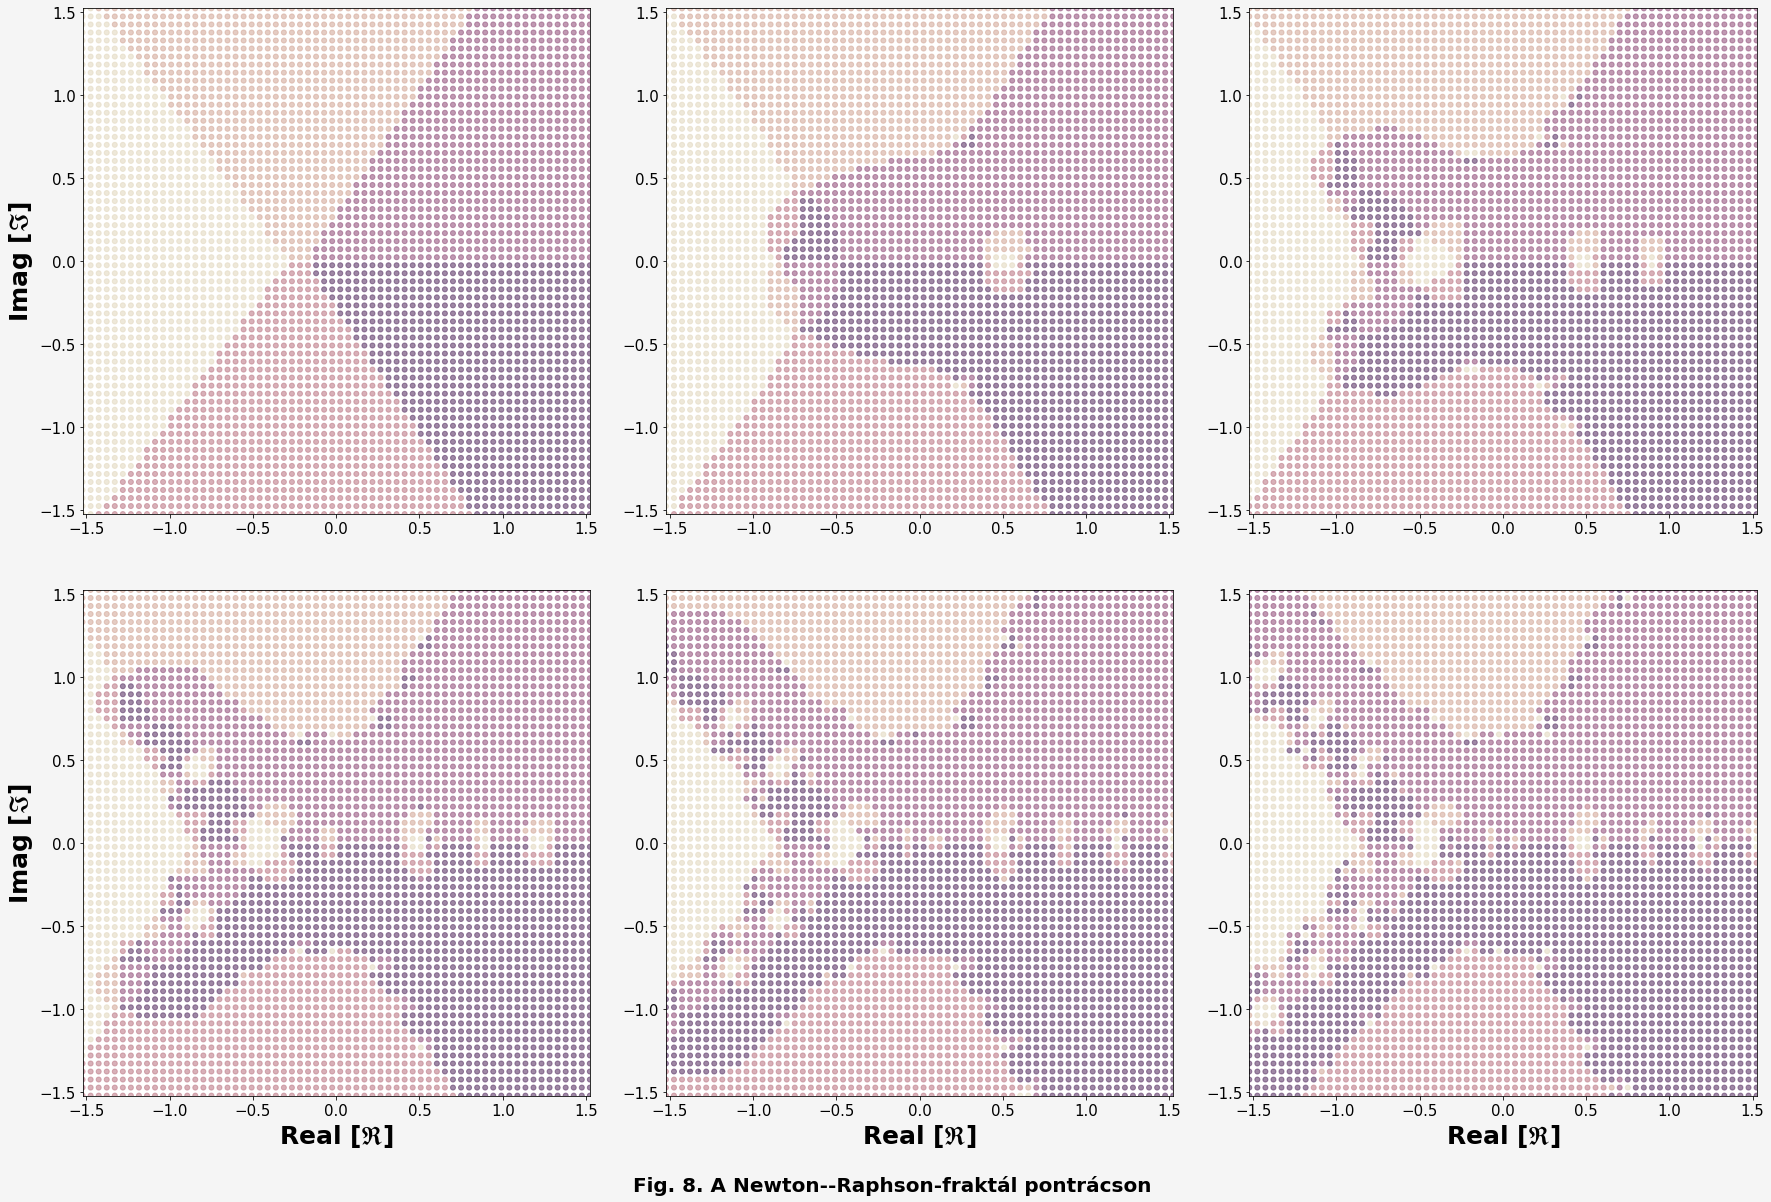

In [18]:
NR_fractal_steps_reversed(P, N=N,
                          steps=[1,2,3,4,5],
                          grid_lim=grid_lim)

<p style="font-size:16px">
Habár valamilyen érdekesnek tűnő forma halványan felsejlik a színes pontrácson, sok részlet sajnos nem vehető ki belőle. Azonban növelve a felbontást láthatóvá válik, hogy mivel is van dolgunk...
</p>

### Növeljük a felbontást, hogy meglássuk a... ezt az izét? <a name="nr-fractal"></a>

In [19]:
# Possible zooming locations
grid_lims = (
  ((-1.75,1.75),(-1.75,1.75)),
  ((-1.5,1.5),(-1.5,1.5)),
  ((-1.5,0),(-0.75,0.75)),
  ((-1.2,-0.8),(0.0,0.4)),
  ((-1.03,-0.99),(0.13,0.17)),
  ((-1.009290,-1.009265),(0.147300,0.147325))
)

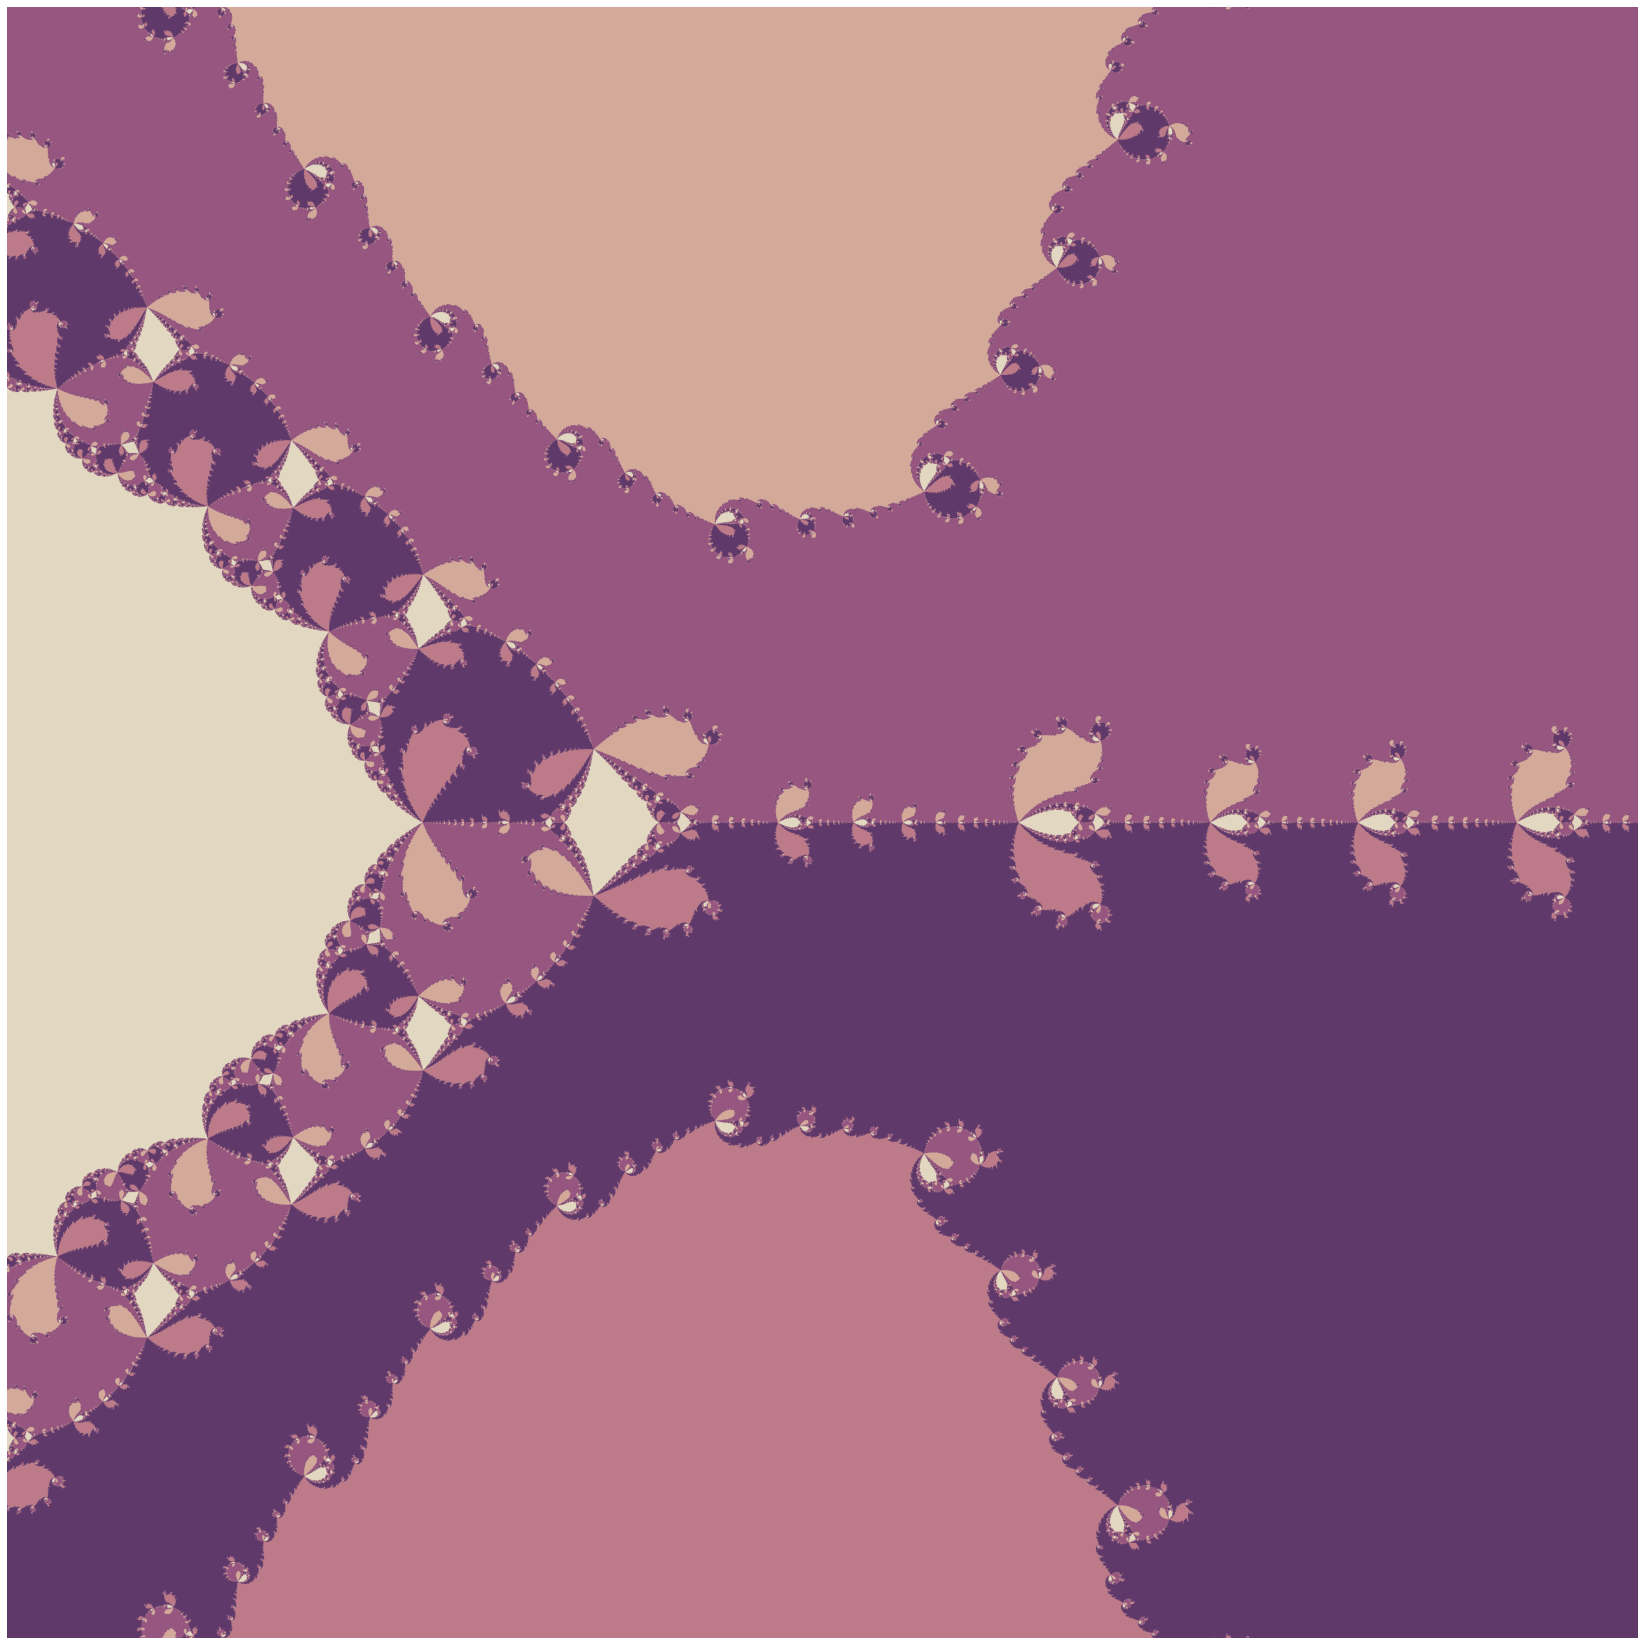

In [21]:
# Choose index only here!
gl = grid_lims[0]

NR_fractal(P,
           N=4096, n_steps=50, figsize=(30,30),
           grid_lim_x=gl[0], grid_lim_y=gl[1],
           axis=False, save=False)

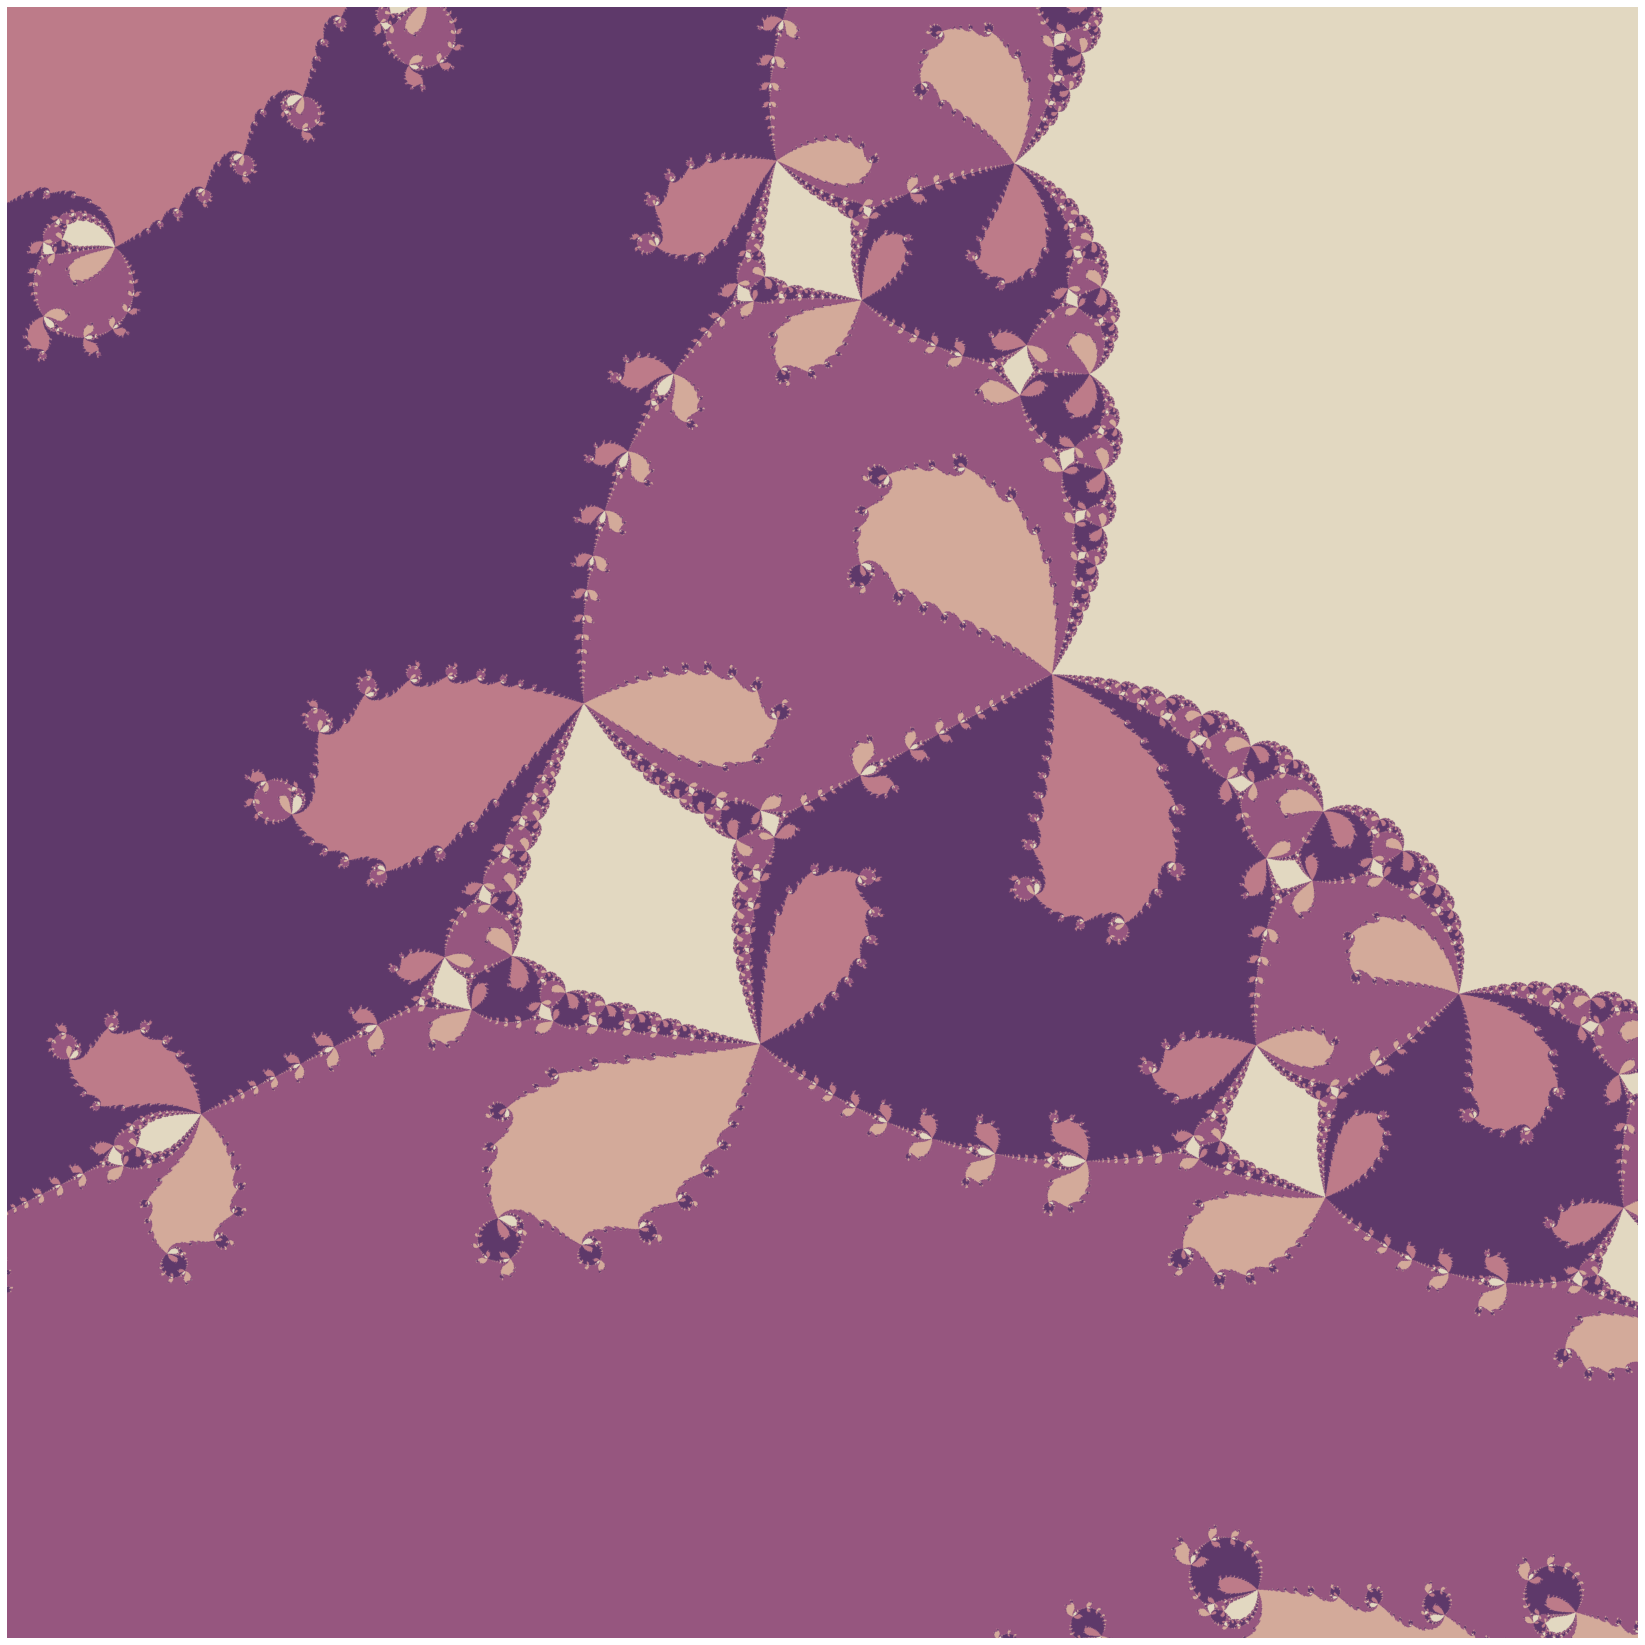

In [22]:
# Choose index only here!
gl = grid_lims[-1]

NR_fractal(P,
           N=4096, n_steps=50, figsize=(30,30),
           grid_lim_x=gl[0], grid_lim_y=gl[1],
           axis=False, save=False)

<p style="font-size:16px">
A fenti pontrácsos ábrákat is tovább nagyíthatjuk, hogy össze tudjuk őket hasonlítani. Ahogy egyre több lépést teszünk meg a Newton--Raphson-módszerrel, úgy lesz egyre részletgazdagabb a Newton--Raphson-fraktál. A lépések száma valójában a fraktál megjeleníthető "mélységét" növeli. Hiába zoomolunk nagy felbontás mellett egy idő után egy Newton--Raphson-fraktálba, a részletek egy idő után teljesen kisimulnak.
</p>

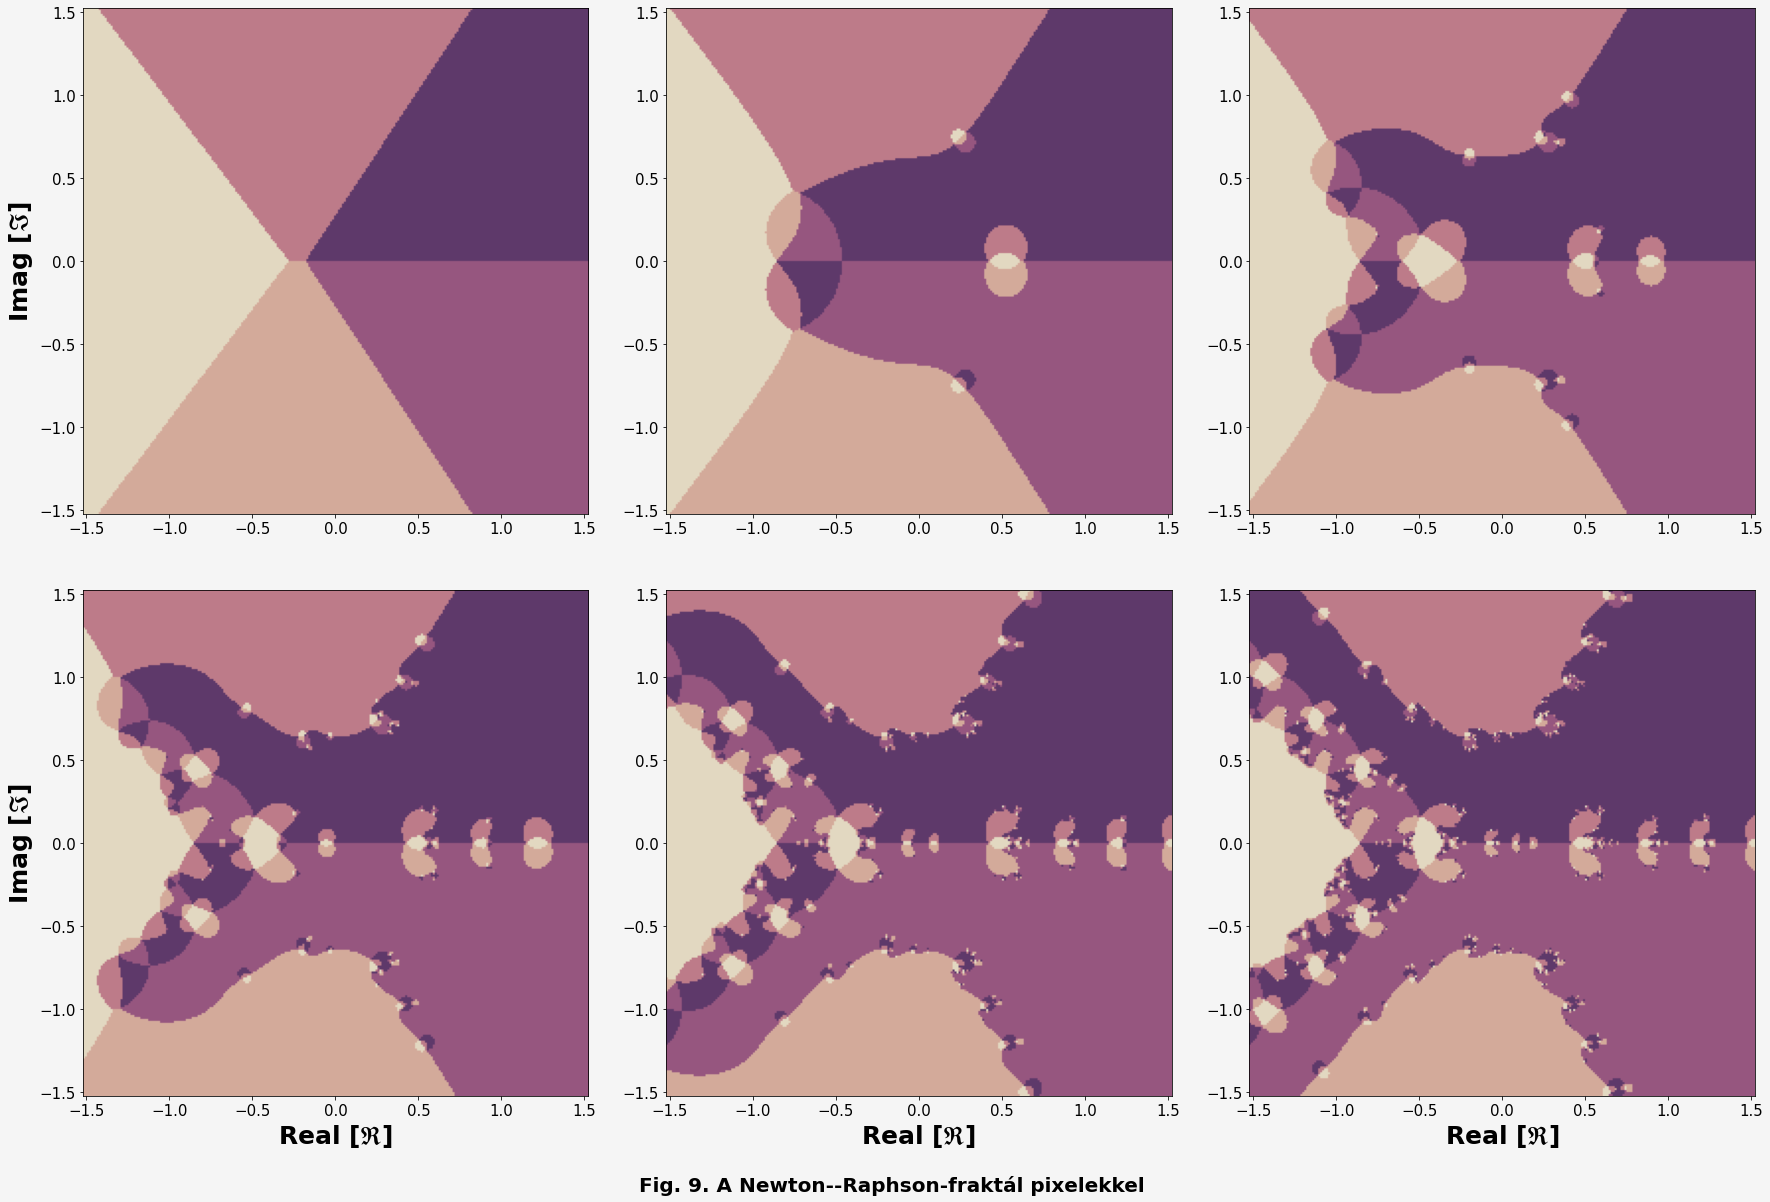

In [23]:
NR_fractal_steps_image(P, N=N*4,
                       steps=[1,2,3,4,5],
                       grid_lim=grid_lim)

<p style="font-size:16px">
Rengeteg érdekes matematikai (és egyben fizikai) összefüggést és finomságot ismerhetünk meg azáltal, ha ezt a kialakult fraktált jobban megvizsgáljuk és egyáltalán megértjük, hogy mégis mi a franc történik itt... Könyörgöm csak elemi deriváltakat számoltunk és teljesen átlagos függvények zérushelyeit kerestük meg, mégis hogy jön egy ilyen... izé ehhez a témakörhöz? Ebbe itt nem mennék bele, akit viszont érdekel, azoknak ajánlom az alábbi két <a href="https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw">3b1b</a> videót:
<br>
<ol type="1" style="font-size:16px">
  <li><a href="https://www.youtube.com/watch?v=-RdOwhmqP5s">Newton's Fractal (which Newton knew nothing about</a></li>
  <li><a href="https://www.youtube.com/watch?v=LqbZpur38nw">How a Mandelbrot set arises from Newton’s work</a></li>
</ol>
</p>

## IV. Vizualizációs tippek és tanácsok <a name="tips-and-trick"></a>

### Colormap-ek <a name="colormaps"></a>

#### **"Perceptually uniform colormaps"**
<p style="font-size:16px"><p style="font-size:16px">
Azokat a színgradienseket hívják így, amikben két tetszőleges szín között az emberi által észlelt különbség arányos a két szín távolságával a színkörön, a gradiens egymást követő értékeinek luminozitása pedig egy monoton növekvő függvény. (Itt a luminozitás alatt a HSL színábrázolás L betűjét értem.) Ehhez lásd egyel lentebbi ábra. A céljuk, hogy ezek olyan színgradiensek legyenek, amik segítségével könnyedén átláthatjuk a velük ábrázolt  adatokat/mennyiségeket. Így szemre is "könnyedén" érezhetjük két adatpont mérete közti különbséget, vagy azok relatív nagyságát a többi adathoz képest.
</p>

#### Domain coloring:
<div align="center">
  <img src="img/domain.png" width="80%"></img>
</div>

In [24]:
from colormaps import *

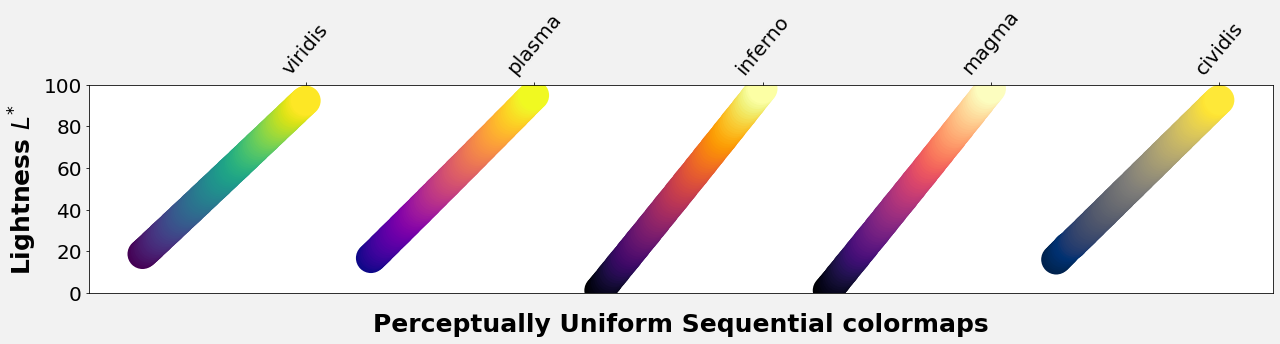

In [25]:
puc_lightness()

#### **"Diverging colormaps"**
<p style="font-size:16px">
Amikor azt szeretnék érzékeltetni, hogy az adatok mennyivel térnek el egy átlagértéktől, vagy esetleg a $0$-tól.
<br><br>  
Ezen az ábrán pl. az egyes pontok országokat jelölnek, a pontok színei pedig azoknak az egyenlítőtől való távolságát jelölik szélességi fokokban.Ezen az ábrán pl. az egyes pontok országokat jelölnek, a pontok színei pedig azoknak az egyenlítőtől való távolságát jelölik szélességi fokokban. Itt a fejlődési mutatóik (WDI) alapján transzformáltam egy 2D bázisra a világ országait a t-SNE dimenzióredukciós módszerrel. A hat ábrát a t-SNE egyik alapvető paraméterének ("perplexity") változtatásával kaptam meg. Ismert összefüggés a gazdaságtudományban, hogy az országok fejlődési mutatói korrelálnak az országok egyenlítőtől vett távolságával. Az ábra mögötti ötletem annyi volt, hogy ha ezt a sok-száz fejlődési mutatót (ami egy sok-száz dimenziós tér) egy alacsonyabb, 2D térbe transzformálom, akkor ebben a térben meg kell jelenjen ez a földrajzi pozíciótól függő összefüggés. Habár vannak erősen kilógó adatok, a felső sor középső és jobb szélső ábráján valóban ez valóban láthatóvá is válik. Ezen a két grafikonon a kék színű pontok (egyenlítőtől délre található országok) a ponthalmaz egyik oldalára, míg a pirosak (egyenlítőtől északra található országok) a másikra gyűlnek össze.
<br><br>
(Megjegyzés: Mivel az országok jelentős hányada az egyenlítőtől északra található, így annyira nem meglepő, hogy néhány pirosas színű ország is keveredik, azonban ezek szinte kivétel nélkül egyenlítőhöz közeli országok, ahogy a nagy halvány színükből látszik, míg a sötétebb pirosak egyértelműen jól elkülönülnek.)
</p>
<div align="center">
  <img src="img/diverging_1.png" width="90%"></img>
</div>

<p style="font-size:16px">
Közbeékelt magyarázat a következő ábrához: A főkomponens analízis (PCA) célja, hogy egy N dimenziós adatsort egy új bázisra transzformáljon át. Az új bázis bázisvektorait az eredeti adatsor varianciája határozza meg. A legelső bázisvektor (vagy ún. "főkomponens") irányát az adatsorban található legnagyobb variancia iránya jelöli ki. Minden további bázisvektor/főkomponens erre és minden előzőleg már meghatározott bázisvektorra ortogonális. Sorrendjüket az irányukban található variancia mértéke határozza meg, kezdve a legnagyobbtól a legkisebbig.
<br><br>
Az beláltható, hogy ezek a főkomponensek így egzaktul az adatsor kovariancimátrixának sajátvektorai, de ez már csak mellékes megjegyzés.
</p>

In [26]:
from pca import *

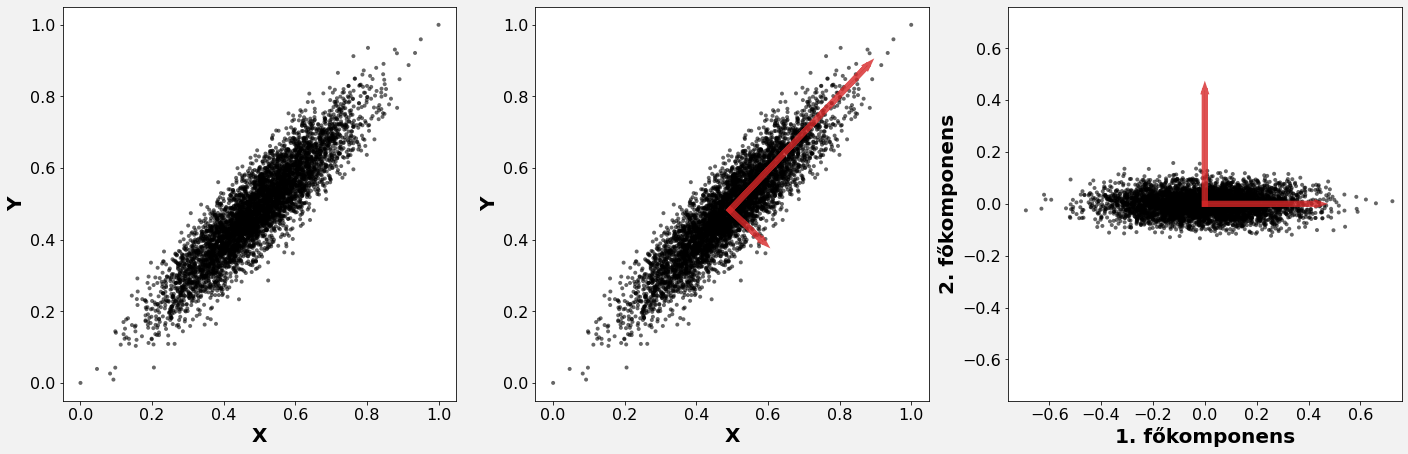

In [27]:
plot_pca(n_samples=5000, noise=5,
         pad=0.05)

<p style="font-size:16px">
Ezen az alábbi ábrán néhány népszerű kriptoeszköz idősorát vizsgáltam PCA-val. Egészen pontosan 6 kriptovalutáét, amiket PCA-val egy 3 dimenziós bázisra transzformáltam. Ezen az ábrán pedig az egyes kriptovaluták, az adott főkomponenshez adott hozzájárulási értékeit jelöltem. Ez az ábra igazából azt mutatja, hogy egy adott kriptovaluta hogyan és milyen mértékben befolyásolja a kriptovaluták árfolyamingadozásait. Itt is fontos volt, hogy most pozitív, vagy negatív irányban történik ez a hatás és az is, hogy mekkora. Emiatt ezeket az értékeket abszolút adott volt, hogy ilyen széttartó színgradienssel jelöljem. 
</p>
<div align="center">
  <img src="img/diverging_2.png" width="80%"></img>
</div>

#### **Seaborn colormapek**

<p style="font-size:16px">
Maga a <code>seaborn</code> csomag lehetővé teszi az egyszerű színgradiens generálást is, de nagyon sok előre definiált és nagyon jó gradiensből válogathat az ember.
</p>

In [28]:
import numpy as np
import seaborn as sns

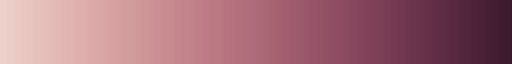

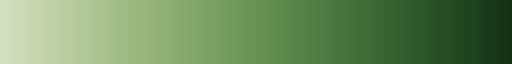

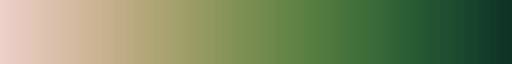

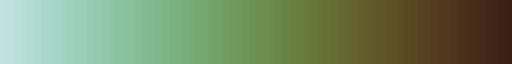

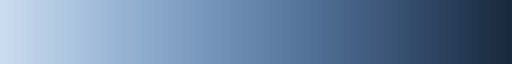

In [33]:
start = np.random.random(size=5)
rot = np.random.random(size=5)
for s, r in zip(start, rot):
  sign = np.sign(np.random.random()-0.5)
  display(sns.color_palette("ch:start={},rot={}".format(s*sign,r*sign), as_cmap=True))

### Beépített függvények használata <a name="built-in"></a>

Gyakori subplot generálás, ahol nincs felhasználva az erre beéíptett függvény, ami viszont jóval több mindent tud és sokkal átláthatóbb is a használata...

```python
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Helyette inkább azt, hogy

fig, ax = plt.subplots(nrows=1, ncols=1)
```
<p style="font-size:16px">
Egy fokkal érthetőbb és átláthatóbb...
</p>

<p style="font-size:16px">
Másik gyakran látott elmulszatása a beépített függvények használatának, amit sokszor látok:
</p>

```python
plt.plot(X, Y, marker='o')

# Helyette inkább azt, hogy

plt.scatter(X, Y)
```

### A Google és a dokumentációk használata <a name="google-and-docs"></a>
<p style="font-size:16px">
A legtöbb lényeges Python csomag, amit az ember napi szinten használ, elég jól dokumentált. Bizonyos mértékben ilyenek a vizualizációs csomagok is (pl. <code>matplotlib</code>, vagy <code>seaborn</code>). Sajnos ezeknél vannak sokkal jobban dokumentált csomagok is (mint pl. a <code>scikit-learn</code>), azonban vannak annyira jók, hogy kiegészítve őket a <a href="https://stackoverflow.com/">StackOverflow</a>-val, minden metódus és függvény használatára fény derül.
<br><br>
Az internetről szerzett kódrészleteket érdemes megjelölni mindig az adott helyen, mert az ember könnyen vissza tudja ilyenkor keresni, hogy honnan is származik az adott ötlet és hogy is nézett ki a pontos, eredeti kódrészlet. Itt van például az a kód, amivel a fenti t-SNE ábrámhoz magához az ábra jobb szélén látható colorbar-t készítettem:
</p>
<div align="center">
  <img src="img/stackoverflow.png" width="80%"></img>
</div>

In [30]:
import matplotlib.pyplot as plt

In [ ]:
# Click inside the parenthesis and click shift + tab
fig, axes = plt.subplots();

## 5. Kitekintés <a name="other"></a>

### 5.1. Python -- Manim és egyebek <a name="manim"></a>

#### **Manim**
<p style="font-size:16px">
Grant Sanderson (3b1b) kezdeményezéseként indult, ma már nagy fejlesztő community-val rendelkező csomag, aminek a célja, hogy matematikai, magyarázó vizualizációkat készítsünk nagyon egyszerűen, rengeteg beépített függvénnyel. Ez tényleg egy animációkat készítő csomag, <a href="https://3b1b.github.io/manim/getting_started/example_scenes.html">szóval érdemes animációkat nézni róla</a>.
</p>

#### **Datashader**
<p style="font-size:16px">
Ha nagyon sok adatpontunk van (akár több milliárd), akkor azokat nem tudjuk egyesével mind ábrázolni, főleg nem akkor, ha ezek pl. 3 dimenziósak. Ahhoz, hogy ezt áthidaljuk, szokás maguk az adatpontok helyett azok "sűrűségét", vagy "projektált sűrűségét" ábrázolni. A "projektált sűrűség" annyit takar, hogy ha egy kiválasztott irányból nézzük a 3D-s adatokat, akkor nagyon sok olyan pont lesz, amik egymással átfednek, de helyenként ritkásabb, vagy teljesen üres foltok is vannak. Ezt, mint "sűrűség" ábrázolva, ahol a nagyobb sűrűség a sok, míg a kisebb a kevés egymást átfedő pontot ábrázolja, megkapunk egy lehetséges, "projektált sűrűséget" mutató ábrát.
<br><br>
Ilyet tud a <code>matplotlib</code> is, de nagyon nem optimalizált a kódja és szörnyen lassú. Cserébe van egy külön csomag csak erre (és pár más dologra is), aminek <code>datashader</code> a neve. <a href="https://www.easyzoom.com/imageaccess/65cd4f4e19ef4565b13f0f8b9e76c5ca">Itt egy példa</a> egy ilyen vizualizációról, amit <code>datashader</code>rel készítettem. Az ábrán a Gaia DR2-ben található 1.6 milliárd csillag pozícióját ábrázoltam.
</p>

#### **Bokeh/Plotly**
<p style="font-size:16px">
Ezekről talán majd jövőre...
</p>

### 5.2. Processing <a name="processing"></a>

<p style="font-size:16px">
Ehhez MÉG sajnos nem értek, de nagyon szép dolgokat lehet benne csináni és vizualizációs körökben nagyon népszerű. Pl. <a href="https://www.instagram.com/j.maffe/https://www.instagram.com/j.maffe/">itt egy</a> Instagram profil, amin Processingben készült vizualizációk vannak.
</p>